<a href="https://colab.research.google.com/github/laffertybrian/food-sales-predictions/blob/main/food_sales_prediction_part_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Food Sales Prediction Project

##Week 1

###Importing libraries and data file

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

filename = '/content/drive/MyDrive/01 Python for Data Science/sales_predictions.csv'

sales_predictions_df = pd.read_csv(filename)
sales_predictions_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##Week 2

###Exploring the dataframe

In [93]:
# Finding the shape of the dataframe
sales_predictions_df.shape
# has 8523 rows and 12 columns

(8523, 12)

In [94]:
# Learning more about the datatypes of the variables
sales_predictions_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [95]:
# Checking data for duplicate values
sales_predictions_df.duplicated().sum()
# There are no duplicated rows

0

In [96]:
# Looking at the info of the dataframe
sales_predictions_df.info()
# Item weight and outlet size seem to have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [97]:
# Another way to view missing values
sales_predictions_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

###Addressing Missing Values

Understanding Outlet_Size and if other data within the dataframe could be used to fill the missing data.



In [98]:
# Viewing information contained within the Outlet_Size column
sales_predictions_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [99]:
# Exploring data to see if data has a clue to correcting missing values
sales_predictions_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [100]:
# Exploring outlet size to see if it can show us more about outlet type
sales_predictions_df.groupby(['Outlet_Size', 'Outlet_Type'])['Outlet_Size'].count()

Outlet_Size  Outlet_Type      
High         Supermarket Type1     932
Medium       Supermarket Type1     930
             Supermarket Type2     928
             Supermarket Type3     935
Small        Grocery Store         528
             Supermarket Type1    1860
Name: Outlet_Size, dtype: int64

In [101]:
# Exploring outlet size compared to outlet location type
sales_predictions_df.groupby(['Outlet_Size', 'Outlet_Location_Type'])['Outlet_Size'].count()

Outlet_Size  Outlet_Location_Type
High         Tier 3                   932
Medium       Tier 1                   930
             Tier 3                  1863
Small        Tier 1                  1458
             Tier 2                   930
Name: Outlet_Size, dtype: int64

In [102]:
# Putting the information known in the dataframe to help fill in missing values
sales_predictions_df.groupby(['Outlet_Size', 'Outlet_Type', 'Outlet_Location_Type'])['Outlet_Size'].count()

Outlet_Size  Outlet_Type        Outlet_Location_Type
High         Supermarket Type1  Tier 3                  932
Medium       Supermarket Type1  Tier 1                  930
             Supermarket Type2  Tier 3                  928
             Supermarket Type3  Tier 3                  935
Small        Grocery Store      Tier 1                  528
             Supermarket Type1  Tier 1                  930
                                Tier 2                  930
Name: Outlet_Size, dtype: int64

In [103]:
#sales_predictions_df.groupby(['Outlet_Size', 'Outlet_Identifier', 'Outlet_Type', 'Outlet_Location_Type'])['Outlet_Size'].count()

After exploring the data it seems that columns Outlet_Type and Outlet_Location_Type can be used to potentially fill in the missing data from Outlet_Size.

In [104]:
# Getting a subset of data from the dataframe where supermarket type 1 and tier 3
# if there are any na values in the outlet size in this set they should be high
outlet_type_supermarket1 = sales_predictions_df['Outlet_Type'] == 'Supermarket Type1'
outlet_location_type_t3 = sales_predictions_df['Outlet_Location_Type'] == 'Tier 3'

# none meet this criteria

outlet_type_supermarket2 = sales_predictions_df['Outlet_Type'] == 'Supermarket Type2'
test_medium2 = sales_predictions_df.loc[outlet_type_supermarket2, :]

# na outlet field search
outlet_size_na_filter = sales_predictions_df['Outlet_Size'].isna()
outlet_size_na = sales_predictions_df.loc[outlet_size_na_filter, :]



In [105]:
# finding supermarket type1 and tier 2
outlet_location_type_t2 = sales_predictions_df['Outlet_Location_Type'] == 'Tier 2'
test_small_smt1_t2 = sales_predictions_df.loc[outlet_type_supermarket1 & outlet_location_type_t2, :]
test_small_smt1_t2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2785 entries, 8 to 8520
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            2785 non-null   object 
 1   Item_Weight                2785 non-null   float64
 2   Item_Fat_Content           2785 non-null   object 
 3   Item_Visibility            2785 non-null   float64
 4   Item_Type                  2785 non-null   object 
 5   Item_MRP                   2785 non-null   float64
 6   Outlet_Identifier          2785 non-null   object 
 7   Outlet_Establishment_Year  2785 non-null   int64  
 8   Outlet_Size                930 non-null    object 
 9   Outlet_Location_Type       2785 non-null   object 
 10  Outlet_Type                2785 non-null   object 
 11  Item_Outlet_Sales          2785 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 282.9+ KB


In the dataframe Outlet_Size with the 'Small' value has certain creiteria based on Outlet_Type and Outlet_Location_Type. If there are missing values that also share these same criteria, it would be reasonable to fill in the missing values based on these findings.

No other Outlet_Size besides 'Small' contains the Outlet_Type equal to 'Grocery Store'. Also no other Outlet_Size besides 'Small' is associated with Outlet_Type 'Supermarket Type1' and Outlet_Location_Type 'Tier 2'.

In [106]:
# testing to replace nan values with small in this category
test_small_smt1_t2['Outlet_Size'].fillna('Small', inplace = True)
test_small_smt1_t2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2785 entries, 8 to 8520
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            2785 non-null   object 
 1   Item_Weight                2785 non-null   float64
 2   Item_Fat_Content           2785 non-null   object 
 3   Item_Visibility            2785 non-null   float64
 4   Item_Type                  2785 non-null   object 
 5   Item_MRP                   2785 non-null   float64
 6   Outlet_Identifier          2785 non-null   object 
 7   Outlet_Establishment_Year  2785 non-null   int64  
 8   Outlet_Size                2785 non-null   object 
 9   Outlet_Location_Type       2785 non-null   object 
 10  Outlet_Type                2785 non-null   object 
 11  Item_Outlet_Sales          2785 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 282.9+ KB


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [107]:
# replaced nan values based on insight from the dataframe
# specifically 'Outlet_Type' to be Supermarket Type 1 and 'Outlet_Location_Size' to be Tier 2
df = sales_predictions_df
sales_predictions_df.loc[(df['Outlet_Type'] == 'Supermarket Type1') & (df['Outlet_Location_Type'] == 'Tier 2') & (df['Outlet_Size'].isnull()), 'Outlet_Size'] = 'Small'
sales_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                7968 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [108]:
# searching for gorcery stores
grocery_filter = sales_predictions_df["Outlet_Type"] == "Grocery Store"
grocery_df = sales_predictions_df.loc[grocery_filter, :]
# Filling in the values of Outlet_Size based on Outlet_Type being equal to 'Grocery Store'
sales_predictions_df.loc[(df['Outlet_Type'] == 'Grocery Store') & (df['Outlet_Size'].isnull()), 'Outlet_Size'] = 'Small'
sales_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


After applying the patterns found in the data to the missing values in the Outlet_Size column, there are now 0 non-null values.

-- Now beginning to look at the missing data in the Item_Weight column.



In [109]:
# Getting information about the Item_Weight column
sales_predictions_df["Item_Weight"].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [110]:
# What percentage of the data from the Item Weight column is missing
1 - (7060 / 8523)

0.17165317376510614

I am choosing to replace the missing data in the Item_Weight column with the mean based on the flowing:

*   17% is relatively low 
*   I have never made a choice in a Grocery Store/Supermarket based on the items weight. (I am considering myslef a subject matter expert)



In [111]:
# Calculating the mean of the Item_Weight column
item_weight_mean = sales_predictions_df['Item_Weight'].mean()
# Applying the mean to the missing values in the column
sales_predictions_df['Item_Weight'].fillna(item_weight_mean, inplace = True)
# Checking that all values in the dataframe are non-null
sales_predictions_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

All values are non-null in the dataframe.

###Addressing inconsistent category data

In [112]:
# Reviewing the data and looking at each column

# Found an issue with Item Fat Content
sales_predictions_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [113]:
# Correcting the syntax differences by using replace method

sales_predictions_df['Item_Fat_Content'] = sales_predictions_df['Item_Fat_Content'].replace('LF', 'Low Fat')
sales_predictions_df['Item_Fat_Content'] = sales_predictions_df['Item_Fat_Content'].replace('low fat', 'Low Fat')
sales_predictions_df['Item_Fat_Content'] = sales_predictions_df['Item_Fat_Content'].replace('reg', 'Regular')
# Printing the value counts again to check data within the column
sales_predictions_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

No other columns had incosistent data.

###Column Summary

Information about each column

In [114]:
# Information for Item Identifier
sales_predictions_df['Item_Identifier'].describe()

count      8523
unique     1559
top       FDW13
freq         10
Name: Item_Identifier, dtype: object

In [115]:
# Information about Item Weight
sales_predictions_df['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [116]:
# Information for Fat Content
sales_predictions_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [117]:
# Information for Item Visibility
sales_predictions_df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [118]:
# Information for Item Type
# Counts of the different values
print(sales_predictions_df['Item_Type'].value_counts())
# Number of unique items, top item
sales_predictions_df['Item_Type'].describe()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


count                      8523
unique                       16
top       Fruits and Vegetables
freq                       1232
Name: Item_Type, dtype: object

In [119]:
# Information about Item MRP
sales_predictions_df['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [120]:
# Information about Outlet Identifier
sales_predictions_df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [121]:
# Information about Outlet Establishment Year
print(sales_predictions_df['Outlet_Establishment_Year'].describe().round(2))
print('\n')
print(sales_predictions_df['Outlet_Establishment_Year'].value_counts())

count    8523.00
mean     1997.83
std         8.37
min      1985.00
25%      1987.00
50%      1999.00
75%      2004.00
max      2009.00
Name: Outlet_Establishment_Year, dtype: float64


1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


In [122]:
# Information about Outlet Size
sales_predictions_df['Outlet_Size'].value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [123]:
# Information about Outlet_Location_Type
sales_predictions_df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [124]:
# Information about Outlet Type
sales_predictions_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [125]:
# Information about Item Outlet Sales
sales_predictions_df['Item_Outlet_Sales'].describe().round(2)

count     8523.00
mean      2181.29
std       1706.50
min         33.29
25%        834.25
50%       1794.33
75%       3101.30
max      13086.96
Name: Item_Outlet_Sales, dtype: float64

##Week 3

###Exploratory Visualizations

Heatmaps:

Starting with a general heatmap to look for correlation between variables.

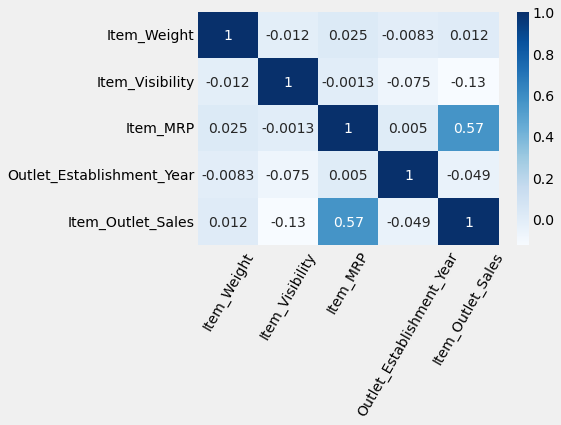

In [126]:
# Start by correlating values
corr_values = sales_predictions_df.corr()
# Creating the heatmap
sns.heatmap(corr_values, cmap = 'Blues', annot = True);
plt.xticks(rotation = 60);

>There is some positive correlation between Item_MSP (the items price) and Item_Outlet_Sales.

Created an additional column called Units_Sold by dividing Item_Outlet_Sales by Item_MRP. Then created a heatmap to see the resutls.

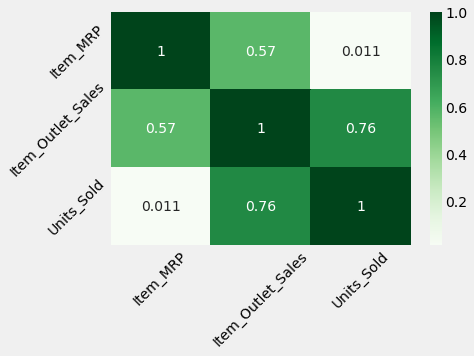

In [193]:
# creating a heatmap for item mrp, outlet sales, and creating a column for units sold
# creating dataframe with data needed
item_sales_map = sales_predictions_df.loc[:,['Item_MRP', 'Item_Outlet_Sales']]
# creating a units sold column
item_sales_map.loc[:,'Units_Sold'] = round(item_sales_map['Item_Outlet_Sales'] / item_sales_map['Item_MRP'])
# calculating correlation
item_sales_map_corr = item_sales_map.corr()
# creating heatmap
sns.heatmap(item_sales_map_corr, cmap = 'Greens', annot = True);
plt.xticks(rotation = 45);
plt.yticks(rotation = 45);

plt.savefig('fig2.png', bbox_inches='tight')

>There is a strong positive correlation to Units_Sold and Item_Outlet_Sales.

Historgram:

Exploring the data and the link between low fat and regular items.

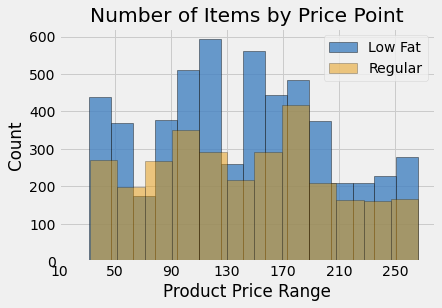

In [128]:
# setting on the columns needed into a new dataframe
type_sales_df = sales_predictions_df[['Item_Type','Item_Outlet_Sales', 'Item_Fat_Content', 'Item_MRP']]

# creating a filter for lowfat items
lowfat_filter = type_sales_df['Item_Fat_Content'] == 'Low Fat'
category_sales_lowfat = type_sales_df.loc[lowfat_filter, :]
# using the opposite of the lowfat filter to get the regular items
category_sales_regular = type_sales_df.loc[~lowfat_filter, :]

# separating the item price for lowfat and regular
category_sales_lowfat_graph = category_sales_lowfat['Item_MRP']
category_sales_regular_graph = category_sales_regular['Item_MRP']

# Graphing the low fat data
category_sales_lowfat_graph.hist(bins = 15, edgecolor = 'black', label='Low Fat', color = '#4482C1', alpha = .80)
# Graphing the regular data
category_sales_regular_graph.hist(bins = 12, edgecolor = 'black', color = '#e69500', label='Regular', alpha=0.48)

# Creating x label and y label
plt.xlabel('Product Price Range')
plt.ylabel('Count')

# Creating title for the histogram
plt.title('Number of Items by Price Point')

# Trying a style
plt.style.use('fivethirtyeight')

# Setting the number of ticks on the x axis
plt.xticks(range(10,255,40));

# Creating a legend for the chart
plt.legend();

>In this chart it is clear to see that there are more items in the low fat category at most price points.

Grouped Bar Chart:

Creating a grouped bar chart to continue the exploration of low fat and regular products.

In [129]:
# Create a chart to show how much more money is generated from Low Fat compared to Regular

# creating dataframe with specefic data
category_sales = sales_predictions_df.loc[:, ['Item_Type', 'Item_Fat_Content', 'Item_Outlet_Sales']]
# creating a dataframe because four categories do not have items bucketed as regular.
# by adding them into the dataframe I am able to graph the data comparatively
adding_these = {'Item_Type': ['Health and Hygiene', 'Hard Drinks', 'Household', 'Others'], 
                'Item_Fat_Content': ['Regular', 'Regular', 'Regular', 'Regular'],
                'Item_Outlet_Sales': [0, 0, 0, 0]}
adding_df = pd.DataFrame(adding_these)
category_sales_complete = pd.concat([category_sales, adding_df])

#making lowfat filter and dataframe
lowfat_filter1 = category_sales_complete['Item_Fat_Content'] == 'Low Fat'
lowfat_content = category_sales_complete[lowfat_filter1]
category_sales_lowfat_content = lowfat_content.groupby('Item_Type')['Item_Outlet_Sales'].sum()
category_sales_lowfat_content.to_frame()
# creating a regular filter and dataframe
regular_content = category_sales_complete[~lowfat_filter1]
category_sales_regular_content = regular_content.groupby('Item_Type')['Item_Outlet_Sales'].sum()
category_sales_regular_content.to_frame();


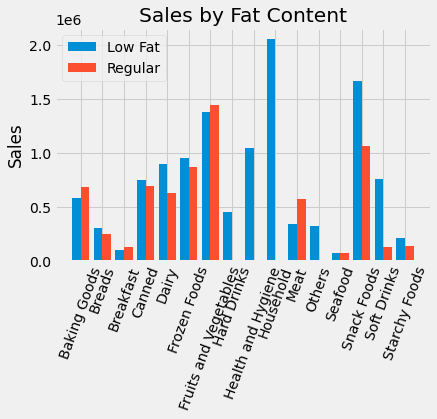

In [130]:
# creating a double bar graph of above infomation
labels = category_sales_regular_content.index

# creating different arrays to graph lowfat and regular
lowfat_values = category_sales_lowfat_content.values
regular_values = category_sales_regular_content.values

# making sure that the labels fit on the x axis
x = np.arange(len(labels))
# controling the width of the bars
width = 0.40

# creating the graph
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lowfat_values, width, label='Low Fat')
rects2 = ax.bar(x + width/2, regular_values, width, label='Regular')

# Adding labels for y axis, creating title, legend, and making x axis labels readable
ax.set_ylabel('Sales')
ax.set_title('Sales by Fat Content')
plt.xticks(x, labels, rotation = 70)
ax.legend();

>This chart shows the breakdown of lowfat and regular in each category.

Horizontal Bar Chart:

Creating a horizontal bar chart to show how many total units were sold in each category.

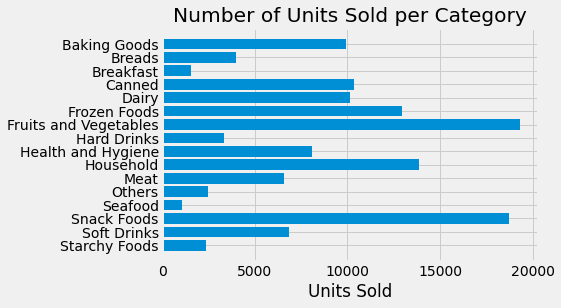

In [131]:
# Creating a column for units sold
units_sold_df = sales_predictions_df
units_sold_df.loc[:,'Units_Sold'] = round(units_sold_df['Item_Outlet_Sales'] / units_sold_df['Item_MRP'])
units_sold_graph = units_sold_df.groupby('Item_Type')['Units_Sold'].sum()
units_sold_graph.to_frame()

# Creating the chart
fig, ax = plt.subplots()

# data for the chart
categories = list(units_sold_graph.index)
y_pos = np.arange(len(categories))
units = units_sold_graph.values

# setting the labels, title and making sure y axis ticks match up with categories
ax.barh(y_pos, units, align='center')
plt.yticks(y_pos, labels=categories)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Units Sold')
ax.set_title('Number of Units Sold per Category');

>This chart shows units sold in each category. 

Stacked Bar Chart:

Creating a stacked bar chart to better understand units sold. This time we will look at each category by Units_Sold.

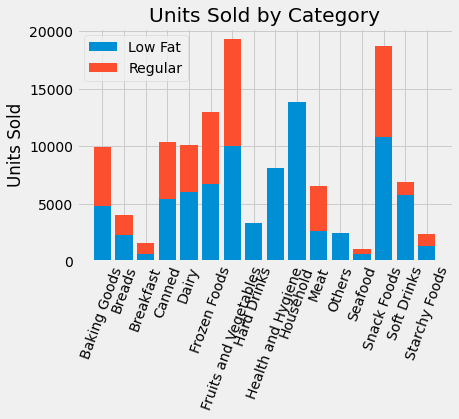

In [132]:
# Filtering the units sold dataframe to get data for item type (low fat and regular)
lowfat_units_sold = units_sold_df[lowfat_filter]
regular_units_sold = units_sold_df[~lowfat_filter]

# adding rows to make sure that the dataframes are the same length
add_these = {'Item_Type': ['Health and Hygiene', 'Hard Drinks', 'Household', 'Others'],
                'Units_Sold': [0, 0, 0, 0]}
add_df = pd.DataFrame(add_these)
regular_units_sold = pd.concat([regular_units_sold, add_df])

# using groupby to organize the data
lowfat_units_sold_graph = lowfat_units_sold.groupby('Item_Type')['Units_Sold'].sum()
regular_units_sold_graph = regular_units_sold.groupby('Item_Type')['Units_Sold'].sum()
lowfat_units_sold_graph.to_frame()
regular_units_sold_graph.to_frame()

# creating the graph
category_labels = lowfat_units_sold_graph.index
lowfat_units = lowfat_units_sold_graph.values
regular_units = regular_units_sold_graph.values


fig, ax = plt.subplots()

ax.bar(category_labels, lowfat_units, label='Low Fat')
ax.bar(category_labels, regular_units, bottom=lowfat_units, label='Regular')

ax.set_ylabel('Units Sold')
ax.set_title('Units Sold by Category')
plt.xticks(x, category_labels, rotation = 70)
ax.legend();

>This chart breaks down the number of units sold by the fat content. 

Boxplots:

Exploring the data within the dataframe with boxplots. 

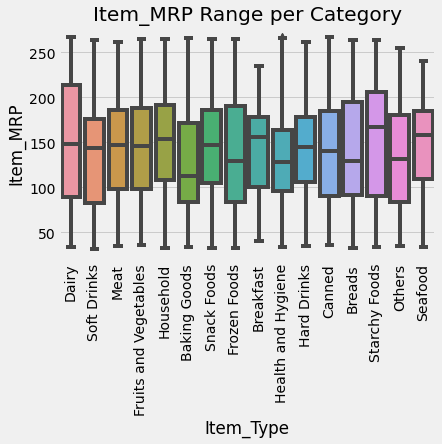

In [133]:
# boxplot on Item MRP data

sns.boxplot(x='Item_Type', y='Item_MRP' , data=sales_predictions_df);
plt.xticks(rotation = 90);
plt.title('Item_MRP Range per Category');

>In this boxplot we can see the range of Item_MRP (retail price) by each category.

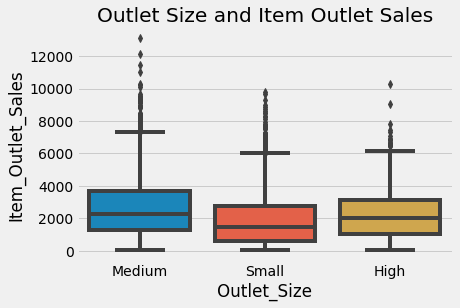

In [134]:
# boxplot on outlet size
sns.boxplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', data = sales_predictions_df);
plt.title('Outlet Size and Item Outlet Sales');

>This plot shows the item sales at each of the three different outlet sizes.

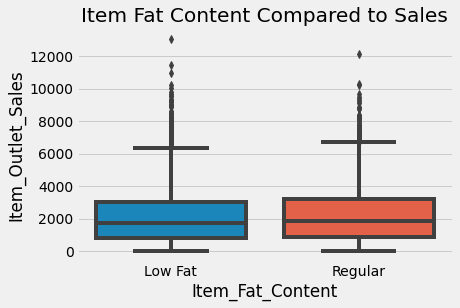

In [135]:
# boxplot for item fat content
sns.boxplot(x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', data = sales_predictions_df);
plt.title("Item Fat Content Compared to Sales");

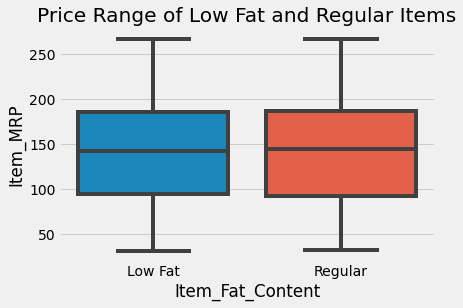

In [136]:
sns.boxplot(x = 'Item_Fat_Content', y = 'Item_MRP', data = sales_predictions_df);
plt.title('Price Range of Low Fat and Regular Items');

Pie Chart:

Using a pie chart to understand sales by Outlet Type.

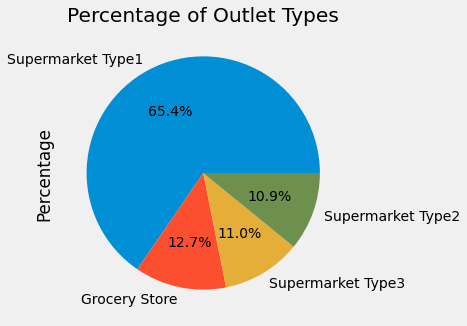

In [137]:
# building the information to graph in a pie chart
outlets = sales_predictions_df['Outlet_Type'].value_counts()
outlets = pd.DataFrame(outlets).reset_index()

outlet_type_percentage = pd.DataFrame()
outlets['Percentage'] = outlets['Outlet_Type'] / 8523

outlets_df = pd.DataFrame({'Outlet_Type_Count': [5577, 1083, 935, 928],
                   'Percentage': [0.654347, 0.127068, 0.109703, 0.108882]},
                  index=['Supermarket Type1', 'Grocery Store', 'Supermarket Type3', 'Supermarket Type2'])

plot = outlets_df.plot.pie(y='Percentage', figsize=(5, 5), legend=False, subplots=True, autopct='%1.1f%%')
plt.title('Percentage of Outlet Types');

>The largest group of stores falls into the Supermarket Type 1 category.

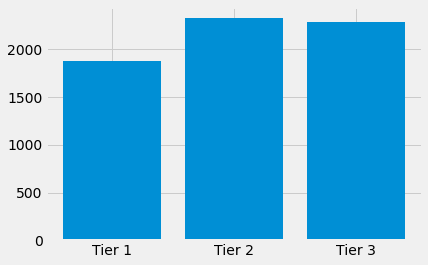

In [191]:
# Exploring how outlet location type impacts the mean sales of items
tier_sales = sales_predictions_df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean()
tier_sales.to_frame()

plt.bar(tier_sales.index, tier_sales.values);

##Week 4

###Explanatory Visualizations

>This section cannot be viewed as intended on Github due to a static render of the notebook that doesn't include the embedded HTML/JavaScript that makes up a plotly graph. This link to the actual colab notebook will enable the charts and map to be viewed as intended. https://colab.research.google.com/drive/1BjYi-dlxsv2XPDr7RXRb961dgamwqib9?usp=sharing

This section will have charts ready for presentation. In some cases I will ploish charts that I have already created. Or create a new chart to highlight a trend in the data.

In the following chart I will atempt to push my abilities and add interactivity to the chart.

In [138]:
# In this chart I adapted code from ployly website: https://plotly.com/python/bar-charts/
# As well as adapted code from stack overflow https://stackoverflow.com/questions/58166002/how-to-add-caption-subtitle-using-plotly-method-in-python

# importing plotly to add interactivity to the chart!
import plotly.graph_objects as go

# creating the graph
fig = go.Figure(data=[
    go.Bar(name='Low Fat', x=category_labels, y=lowfat_units),
    go.Bar(name='Regular', x=category_labels, y=regular_units)
])

# Adding features to the graph
fig.update_layout(barmode='stack',
                  #title="Units Sold by Category", *Just the title with no subtitle
                  title=go.layout.Title(
                  text="Units Sold by Category <br><sup>Broken down by fat content</sup>"),
                  xaxis_title="Category",
                  yaxis_title="Units Sold",
                  legend_title="Fat Content")
fig.show()

>This chart shows potential gaps in the product line where new products could be introduced. It also shows how some categories are dominated by certain fat content products. By hovering over the data the actual value counts will be displayed.

In [139]:
# In this chart I adapted code from https://plotly.com/python/distplot/

import plotly.express as px

fig = px.histogram(type_sales_df, x="Item_MRP", y="Item_Outlet_Sales", color="Item_Fat_Content",
                   marginal="violin",
                   hover_data=type_sales_df.columns)

fig.update_layout(title=go.layout.Title(
                  text="Sales by Item Price Point<br><sup>Broken down by fat content</sup>"),
                  xaxis_title="Item MRP",
                  yaxis_title="Outlet Sales",
                  legend_title="Fat Content")
fig.show()

>This chart shows gaps in the retail price of the items for sale. It also highlights the large amount of sales created by low fat content items. If new items are introduced it is clear that fat content should be considered before the item is introduced.

After making the above two charts for the week 4 assignment I am going outside the box. I would like to simulate additional information and pretend that it was also included in the dataset. The provided information has a lot of detail about the stores (Outlet_Type, Outlet_Identifier, Outlet_Size, Outlet_location_Type, and Outlet_Establishment_Year). I think it is reasonable to assume that the location of the store would also be known. 

I am going to create my own dataset that includes real data from Kaggle (about Chipole locations) and add in Outlet_Type information from this dataset. 

I am going to simulate the fact that I could isolate certain stores based on sales or another performance metric and plot their locations on a map in python.

In [140]:
# I adapted code from the following source https://georgetsilva.github.io/posts/mapping-points-with-folium/
# I also read about foluim here: https://python-visualization.github.io/folium/quickstart.html

# importing folium to make a map in python
import folium

# importing a file I made to symulate store information.
store_file = '/content/drive/MyDrive/04 Explanatory Visualizations/store_location - Sheet1 (1).csv'

store_df = pd.read_csv(store_file)
store_df.head()

,state,location,address,latitude,longitude,type,performance
0,Illinois,Chicago,"10 E Jackson Blvd Chicago, IL 60604 US",41.878334,-87.627218,Supermarket Type1,100
1,Illinois,Chicago,"10 S La Salle St Ste 106 Chicago, IL 60603 US",41.881777,-87.632688,Supermarket Type2,100
2,Illinois,Chicago,"1025 W Belmont Ave Chicago, IL 60657 US",41.939731,-87.655145,Grocery,100
3,Illinois,Chicago,"1027 W Addison St Ste A108 Chicago, IL 60613 US",41.946961,-87.655462,Supermarket Type1,100
4,Illinois,Chicago,"1132 S Clinton St Clinton & Grenshaw Chicago, ...",41.868018,-87.641085,Supermarket Type1,100


In [141]:
# simulating top and bottom performance
# filter for top
top_filter = store_df['performance'] == 100
top_store_df = store_df[top_filter]
# for top store performance
# creating a list of the latitude and longitude to add points to the map
top_locations = top_store_df[['latitude', 'longitude']]
top_locationlist = top_locations.values.tolist()
# for bottom store performance
# creating list of latitude and longitude
bottom_store_df = store_df[~top_filter].reset_index()
bottom_locations = bottom_store_df[['latitude', 'longitude']]
bottom_locationlist = bottom_locations.values.tolist()

In [142]:
# creating the map and using a for loop to add the different points to the map.
map = folium.Map(location=[41.9, -87.7], zoom_start=12)

# Creating string that appears when you hover over the marker
tooltip = 'Click for store type'

# plotting the stores with great store performance in green
for point in range(0, len(top_locationlist)):
    folium.Marker(top_locationlist[point], popup=top_store_df['type'][point], icon=folium.Icon(color='green'), tooltip=tooltip).add_to(map)

# plotting the stores with poor store performance in red
for point in range(len(bottom_locationlist)):
  folium.Marker(bottom_locationlist[point], popup=bottom_store_df['type'][point], icon=folium.Icon(color='red'),tooltip=tooltip).add_to(map)

map

>In this map I am highlighting the strong performing stores in the color green. The stores with poor performance are colored red. This is to simulate what could be possible if location data was present in the dataset.

##Week 5

###Prepare data for Machine Learning

####Loading libraries and dataframe

Loading libraries and reloading the data to ensure there are no data leaks during the process.

In [143]:
# Import Libraries
import pandas as pd
import numpy as nd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [144]:
# Load dataset
# previously linked file to variable filename
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


####Exploring missing data

In [145]:
# ensure that data has missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [146]:
# looking at missing data by columns
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [147]:
# double checking for duplicates
df.duplicated().sum()

0

In [148]:
# viewing the data differently than I did the first time to see if I come to the same conclusion.
df.groupby('Outlet_Identifier', dropna=False)['Outlet_Size'].count()

Outlet_Identifier
OUT010      0
OUT013    932
OUT017      0
OUT018    928
OUT019    528
OUT027    935
OUT035    930
OUT045      0
OUT046    930
OUT049    930
Name: Outlet_Size, dtype: int64

In [149]:
df.groupby('Outlet_Establishment_Year', dropna=False)['Outlet_Size'].count()

Outlet_Establishment_Year
1985    1463
1987     932
1997     930
1998       0
1999     930
2002       0
2004     930
2007       0
2009     928
Name: Outlet_Size, dtype: int64

In [150]:
df.groupby(['Outlet_Identifier', 'Outlet_Establishment_Year'], dropna=False)['Outlet_Size'].count()

Outlet_Identifier  Outlet_Establishment_Year
OUT010             1998                           0
OUT013             1987                         932
OUT017             2007                           0
OUT018             2009                         928
OUT019             1985                         528
OUT027             1985                         935
OUT035             2004                         930
OUT045             2002                           0
OUT046             1997                         930
OUT049             1999                         930
Name: Outlet_Size, dtype: int64

In [151]:
df.groupby(['Outlet_Identifier', 'Outlet_Type', 'Outlet_Location_Type', 'Outlet_Size'], dropna=False)['Outlet_Size'].count()

Outlet_Identifier  Outlet_Type        Outlet_Location_Type  Outlet_Size
OUT010             Grocery Store      Tier 3                NaN              0
OUT013             Supermarket Type1  Tier 3                High           932
OUT017             Supermarket Type1  Tier 2                NaN              0
OUT018             Supermarket Type2  Tier 3                Medium         928
OUT019             Grocery Store      Tier 1                Small          528
OUT027             Supermarket Type3  Tier 3                Medium         935
OUT035             Supermarket Type1  Tier 2                Small          930
OUT045             Supermarket Type1  Tier 2                NaN              0
OUT046             Supermarket Type1  Tier 1                Small          930
OUT049             Supermarket Type1  Tier 1                Medium         930
Name: Outlet_Size, dtype: int64

In [152]:
df.groupby(['Outlet_Type', 'Outlet_Location_Type', 'Outlet_Size'], dropna=False)['Outlet_Size'].count()

Outlet_Type        Outlet_Location_Type  Outlet_Size
Grocery Store      Tier 1                Small          528
                   Tier 3                NaN              0
Supermarket Type1  Tier 1                Medium         930
                                         Small          930
                   Tier 2                Small          930
                                         NaN              0
                   Tier 3                High           932
Supermarket Type2  Tier 3                Medium         928
Supermarket Type3  Tier 3                Medium         935
Name: Outlet_Size, dtype: int64

>In the end I am going to choose to replace the missing data the same way I did before. 

1.   Grocery Stores only have Outlet_Size of Small.
2.   Supermarket Type1, Tier 2 stores have an Outlet_Size of Small.

> I will imputer the missing data in the Outlet_Size column with the value of Small.

>The missing Weight values will be imputed with the mean value.

I will impute the data with SimpleImputer below.



####Adding column for Units_Sold

In [153]:
# During exploratory visualiztion I discovered that units sold was strongly correlated to "Item_Outlet_Sales".
# I will define this new column of Units Sold as Item_Outlet_Sales / Item_MRP
# creating a column for units sold. 
df['Units_Sold'] = df['Item_Outlet_Sales'] / df['Item_MRP']

####Spliting the data into X and y. Preforming train/test split.

>I am choosing to drop the Item_Identifier column. 

I am droping this column because it contains 1559 unique labels. The same label could occur up to 10 times in the column. This column appears to be associated with internal product tracking rather than sales related.


In [154]:
# creating X and y split
# Target for this data is the 'Item_Outlet_Sales' column
y = df['Item_Outlet_Sales']

# Separating these feature columns to make predictions about the target
X = df.drop(columns = ['Item_Outlet_Sales', 'Item_Identifier'])

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

####Addressing Inconsistent Data

In [155]:
# The Fat_Content column has inconsistent data labels
# We will correct this with a dictionary
fat_content_labels = {'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}

# correcting X_train
X_train['Item_Fat_Content'].replace(fat_content_labels, inplace=True)

# correcting X_test
X_test['Item_Fat_Content'].replace(fat_content_labels, inplace=True)

####Instantiate column selectors

In [156]:
# creatintg column selectors
# for int and float types
number_selector = make_column_selector(dtype_include='number')
# for object types I will select which columns will be ordinal or nominal
nominal_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type']
ordinal_columns = ['Outlet_Size', 'Outlet_Location_Type']

####Imputing data

In [157]:
# Instantiate SimpleImputer for the numeric data in column 'Weight'
mean_imputer = SimpleImputer(strategy='mean')

In [158]:
# impute missing category data by instantiating anohter SimpleImputer
constant_value_imputer = SimpleImputer(strategy='constant', fill_value='Small')

####Creating lists for ordinal encoding

In [159]:
# creating ordered lists for both Outlet_Size and Outlet_Location_Type
# Outlet_Size from Small, Medium, High
outlet_size_labels = ['Small', 'Medium', 'High']

# outlet_location_type from tier1, tier2, tier3
location_type_labels = ['Tier 1', 'Tier 2', 'Tier 3']

# creating another list to order the labels into the encoder
ordered_labels = [outlet_size_labels, location_type_labels]

####Instantiate transformers

In [160]:
# Creating a scaler for numeric data columns
scaler = StandardScaler()

# Creating one hot encoder for categorical columns
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# creating an ordinal encoder with ordered labels 
ordinal_encoder = OrdinalEncoder(categories=ordered_labels)

####Creating pipelines

In [161]:
# Pipeline for numeric data
numeric_pipe = make_pipeline(mean_imputer, scaler)

# Pipeline for categorical data
categorical_pipe = make_pipeline(one_hot_encoder)

# Pipeline for ordinal data
ordinal_pipe = make_pipeline(constant_value_imputer, ordinal_encoder, scaler)

####Instantiate Column Transformers

In [162]:
# Tuples for use in transformer
number_tuple = (numeric_pipe, number_selector)
category_tuple = (categorical_pipe, nominal_columns)
ordinal_tuple = (ordinal_pipe, ordinal_columns)

# Column Transformer
preprocessor = make_column_transformer(number_tuple, category_tuple, ordinal_tuple, remainder='passthrough')

####Fit preprocessor

In [163]:
# Fitting preprocessor on training data
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f3a865c7550>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Item_Fat_Content', 'Item_Type',
                                  'Outlet_Identifier', 'Outlet_Type']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Small',
                                                                strategy='constant')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Tier '
                                                                              '1',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '3']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size', 'Outlet_Location_Type'])])

####Process training and test data

In [164]:
# Transforming training and test data with preprocessor
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

####View processed data

In [165]:
# printing na values and data types
print(f'There are {np.isnan(X_train_processed).sum().sum()} missing values in training data!')
print(f'There are {np.isnan(X_test_processed).sum().sum()} missing values in testing data!')
print('\n'+ "-"*42 + '\n')
print(f'All data types in X_train_processed are {X_train_processed.dtype}.')
print(f'All data types in X_test_processed are {X_test_processed.dtype}.')
print('\n'+ "-"*42 + '\n')
print(f'The shape of the NumPy array is {X_train_processed.shape}.')
print('\n'+ "-"*42 + '\n')
X_train_processed

There are 0 missing values in training data!
There are 0 missing values in testing data!

------------------------------------------

All data types in X_train_processed are float64.
All data types in X_test_processed are float64.

------------------------------------------

The shape of the NumPy array is (6392, 39).

------------------------------------------



array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         0.66886204,  1.08494779],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         0.66886204,  1.08494779],
       [-0.13151196,  1.81331864,  0.24454056, ...,  0.        ,
         0.66886204, -1.38477667],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  0.        ,
        -0.79983124, -0.14991444],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  0.        ,
        -0.79983124, -0.14991444],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  0.        ,
        -0.79983124, -1.38477667]])

##Week 6

###Model Assessment and Outcome

####Linear Regression Model

In [166]:
# Loading libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [167]:
# Instantiate the Linear Regression Model
linear_regression_model = LinearRegression()

# Fit the linear regression model on the training data
linear_regression_model.fit(X_train_processed, y_train)

# Using the model to predict targets on the test set
linear_regression_predictions = linear_regression_model.predict(X_test_processed)

In [168]:
# Evaluating the performace of the linear regression model
# R^2
linear_regression_r2 = r2_score(y_test, linear_regression_predictions)
print(f'The Linear Regression Model R^2 score is {linear_regression_r2}')

# RMSE
linear_regression_rmse = np.sqrt(mean_squared_error(y_test, linear_regression_predictions))
print(f'The Linear Regression Model RMSE score is {linear_regression_rmse}')

The Linear Regression Model R^2 score is 0.8935996259555101
The Linear Regression Model RMSE score is 541.8082828850811


####Regression Tree Model

In [169]:
# Loading libraries
from sklearn.tree import DecisionTreeRegressor

In [170]:
# Instantiate the decision tree model
decision_tree = DecisionTreeRegressor(random_state=42)

# Fitting the model to the training data
decision_tree.fit(X_train_processed, y_train)

# predicting target values with the decision tree model
decision_tree_predictions = decision_tree.predict(X_test_processed)

In [171]:
# Evaluating the performace of the decision tree model
print('Decision Tree Model before hyperparameter tuning')

# R^2
decision_tree_r2 = r2_score(y_test, decision_tree_predictions)
print(f'The Decision Tree Model R^2 score is {decision_tree_r2}')

# RMSE
decision_tree_rmse = np.sqrt(mean_squared_error(y_test, decision_tree_predictions))
print(f'The Decision Tree Model RMSE score is {decision_tree_rmse}')

Decision Tree Model before hyperparameter tuning
The Decision Tree Model R^2 score is 0.9960058355767539
The Decision Tree Model RMSE score is 104.97527769670981


In [172]:
# finding the depth of the decision tree
decision_tree.get_depth()

20

In [194]:
# creating the range of depth for the model
depth_range = list(range(2, 21))
# list to hold the values from each test run
decision_tree_r2_list = []
# using a for loop to cycle through the range of depth in the tree
for depth in depth_range:
  decision_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
  decision_tree.fit(X_train_processed, y_train)
  score = decision_tree.score(X_test_processed, y_test)
  decision_tree_r2_list.append(score)

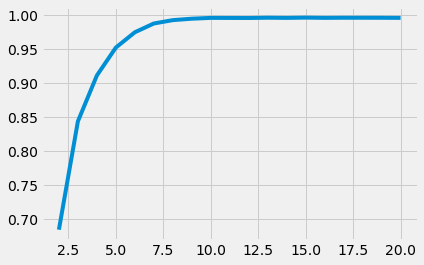

In [195]:
plt.plot(depth_range, decision_tree_r2_list);

In [196]:
decision_tree_r2_dict = dict(zip(depth_range, decision_tree_r2_list))
# selecting the best r^2 in the dictionary
# variables for best r^2 and depth
best_r2 = 0
best_depth = 0
# checking the dictionary for the best R^2 result
for depth, r2 in decision_tree_r2_dict.items():
  current_r2 = r2
  if current_r2 > best_r2:
    best_r2 = r2
    best_depth = depth

print(f'The best depth of the decision tree is {best_depth} since it yeilds the best R^2 of {best_r2}')

The best depth of the decision tree is 15 since it yeilds the best R^2 of 0.9963912372929316


In [197]:
# Re-running the model with the best hyperparapters
# Instantiate the decision tree model with max depth at 15
decision_tree = DecisionTreeRegressor(max_depth=15 ,random_state=42)

# Fitting the model to the training data
decision_tree.fit(X_train_processed, y_train)

# predicting target values with the decision tree model
decision_tree_predictions = decision_tree.predict(X_test_processed)

####Model Recommendation and Performance

>I recommend using the Decision Tree Model to predict Item_Outlet_Sales. Here are some additional metrics to understand the model. I will summarize the findings at the end of this section.

In [199]:
# Calculating the MAE, MSE, and additional metrics.
# Calculating the Mean Absolute Error
mae = mean_absolute_error(y_test, decision_tree_predictions)
print(f'The Mean Square Error of the Decision Tree is {mae}.')

# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, decision_tree_predictions)
print(f'The Mean Squared Error of the Decision Tree is {mse}.')

# Printing the Root Mean Squared Error calculated previously
rmse = np.sqrt(mse)
print(f'The Root Mean Squared Error of the Decision Tree is {rmse}.') 

# Printing the R^2 calculated previously
r2 = r2_score(y_test, decision_tree_predictions)
print(f'The R^2 of the Decision Tree is {r2}.')

The Mean Square Error of the Decision Tree is 45.38219792622884.
The Mean Squared Error of the Decision Tree is 9956.494345885609.
The Root Mean Squared Error of the Decision Tree is 99.78223462062577.
The R^2 of the Decision Tree is 0.9963912372929316.


In [201]:
# Creating a dataframe to better understand the performance of the decision tree model
dec_tree_predictions = pd.Series(decision_tree_predictions)
findings_df = pd.concat([y_test.reset_index(), dec_tree_predictions.reset_index()], axis=1)
findings_df.set_axis(['drop', 'Item_Outlet_Sales', 'double drop', 'Predictions'], axis=1, inplace=True)
# removing the indexes that were created when the data series were merged.
findings_df.drop(columns = ['drop', 'double drop'], inplace=True)

# creating a function to categorize the performance of the model
def difference_sorter(x):
  if x < 20:
    return 'less than 20'
  elif x < 50:
    return 'less than 50'
  elif x < 100:
    return 'less than 100'
  elif x < 150:
    return 'less than 150'
  elif x < 200:
    return 'less than 200'
  elif x < 500:
    return 'less than 500'
  else:
    return 'greater than 500'

# Creating a column in the dataframe that shows the absolute difference between test and prediction values
findings_df['Difference'] = findings_df.apply(lambda row: abs(row.Item_Outlet_Sales - row.Predictions), axis=1)

# creating a column using the above function to categorize the differences calculated
findings_df['Sorted_Difference'] = findings_df['Difference'].apply(difference_sorter)
findings_df.head()

,Item_Outlet_Sales,Predictions,Difference,Sorted_Difference
0,1743.0644,1733.7432,9.3212,less than 20
1,356.8688,383.5008,26.6320,less than 50
2,377.5086,341.5554,35.9532,less than 50
3,5778.4782,5888.3352,109.8570,less than 150
4,2356.9320,2348.9424,7.9896,less than 20


In [202]:
# Exploring the sorted difference column for number of occurances
findings_df['Sorted_Difference'].value_counts()

less than 20        1061
less than 50         531
less than 100        297
less than 150        107
less than 500         68
less than 200         60
greater than 500       7
Name: Sorted_Difference, dtype: int64

In [203]:
# Exploring the difference column with describe
findings_df['Difference'].describe()

count    2131.000000
mean       45.382198
std        88.885645
min         0.000000
25%         6.658000
50%        20.972700
75%        50.600800
max      1807.647000
Name: Difference, dtype: float64

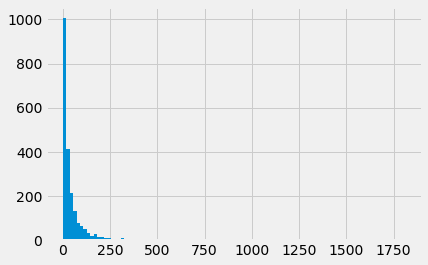

In [204]:
# Creating a histogram to better understand the Decision Tree Model Performance
findings_df['Difference'].hist(bins=100);

>I recommend using the Decision Tree Model for predicting the Item_Outlet_Sales for these reasons:



*   The MSE is 45.38. This shows that the models average error is 45.38 dollars per item prediction. The average value of Item_Outlet_Sales is 2181.29 dollars, so the error represents approximately 2% of the total sales.

*   The model can predict the Item_Outlet_Sales target within 100 dollars 88.64% of the time.
*   The model had 7 predictions that were over 500 dollars off of the actual value. That represents approximately .5% of the predictions.


*   50% of the values had predictions less than 21 dollars from the actual value.




>